Task 7: Conceptual Questions

In [10]:
# 1. Bagging trains models independently and aggregates their results; Boosting builds models sequentially to correct previous errors.

# 2. Random Forest reduces variance by training many decision trees on random subsets of data and features.

# 3. Boosting can overfit on noisy datasets and is sensitive to outliers since it focuses more on difficult instances.


Task 8: Random Forest vs Decision Tree

C:\Users\ARJIT SHARMA\AppData\Local\Temp\ipykernel_12008\4162051698.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\ARJIT SHARMA\AppData\Local\Temp\ipykernel_12008\4162051698.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Decision Tree Accuracy: 0.7821229050279329
Precision: 0.7215189873417721
Recall: 0.7702702702702703


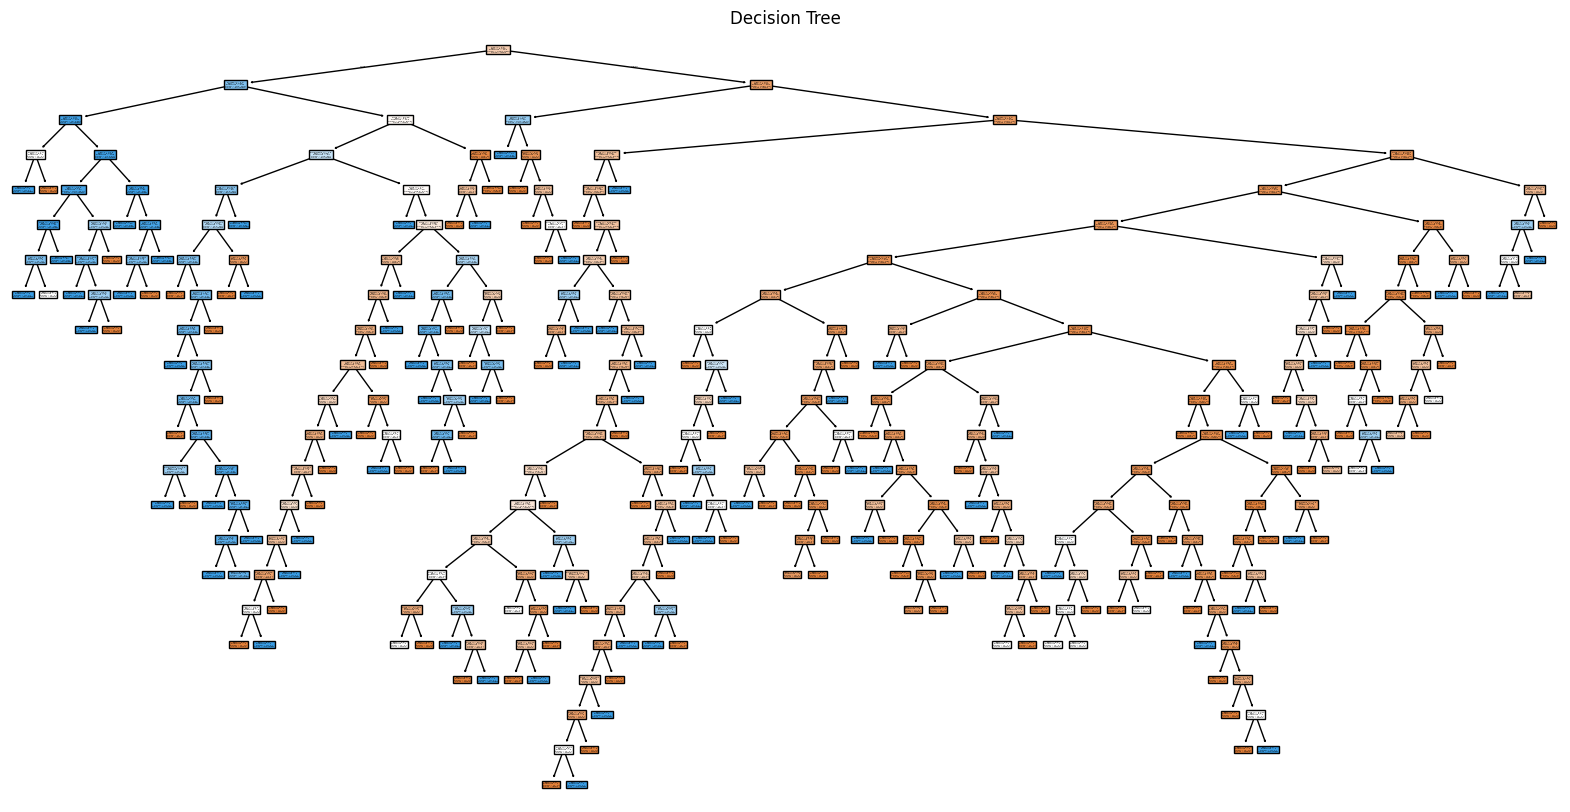


Random Forest Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432


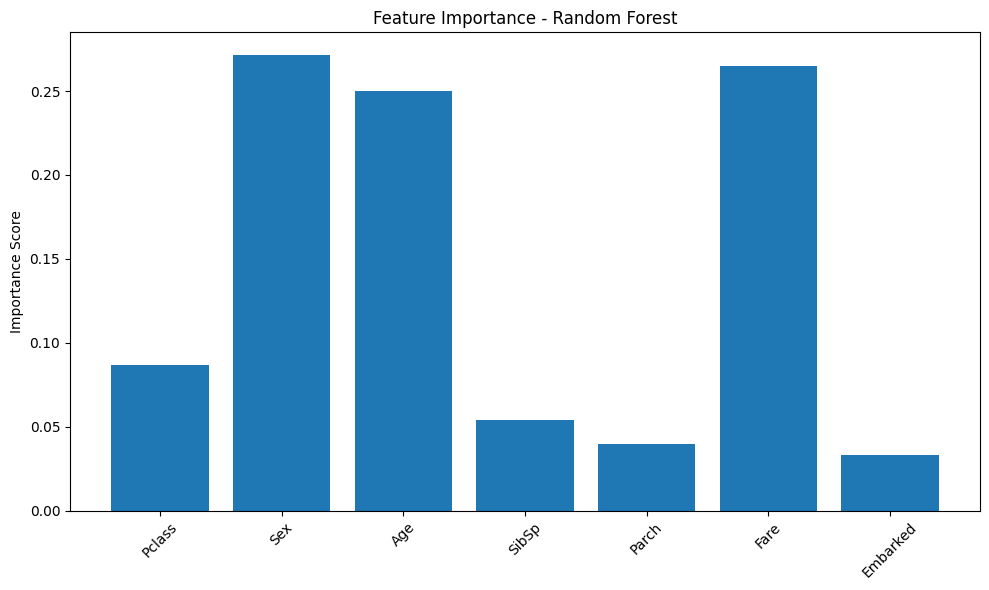


Confusion Matrix - Decision Tree
[[83 22]
 [17 57]]

Confusion Matrix - Random Forest
[[92 13]
 [19 55]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Loading Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
    label_encoders[col] = le

# Define features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# Decision Tree Classifier
# ------------------------
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("Precision:", precision_score(y_test, tree_preds))
print("Recall:", recall_score(y_test, tree_preds))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree")
plt.show()


forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

# Evaluation
print("\nRandom Forest Accuracy:", accuracy_score(y_test, forest_preds))
print("Precision:", precision_score(y_test, forest_preds))
print("Recall:", recall_score(y_test, forest_preds))

# Feature Importance
importances = forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrices
print("\nConfusion Matrix - Decision Tree")
print(confusion_matrix(y_test, tree_preds))

print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(y_test, forest_preds))


Task 9: AdaBoost or Gradient Boosting 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load and preprocess the Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
titanic['Sex'] = le_sex.fit_transform(titanic['Sex'])
titanic['Embarked'] = le_embarked.fit_transform(titanic['Embarked'])

# Features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------
# Decision Tree
# ---------------------
dt_start = time.time()
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
dt_preds = tree.predict(X_test)
dt_end = time.time()

# ---------------------
# Random Forest
# ---------------------
rf_start = time.time()
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)
rf_end = time.time()

# ---------------------
# Gradient Boosting
# ---------------------
gb_start = time.time()
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb_end = time.time()

# ---------------------
# Evaluation Summary
# ---------------------
print("\n--- Performance Metrics ---")
print(f"Decision Tree   -> Accuracy: {accuracy_score(y_test, dt_preds):.3f}, F1: {f1_score(y_test, dt_preds):.3f}, Time: {dt_end - dt_start:.4f}s")
print(f"Random Forest   -> Accuracy: {accuracy_score(y_test, forest_preds):.3f}, F1: {f1_score(y_test, forest_preds):.3f}, Time: {rf_end - rf_start:.4f}s")
print(f"Gradient Boost  -> Accuracy: {accuracy_score(y_test, gb_preds):.3f}, F1: {f1_score(y_test, gb_preds):.3f}, Time: {gb_end - gb_start:.4f}s")


C:\Users\ARJIT SHARMA\AppData\Local\Temp\ipykernel_12008\41609314.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\ARJIT SHARMA\AppData\Local\Temp\ipykernel_12008\41609314.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh


--- Performance Metrics ---
Decision Tree   -> Accuracy: 0.782, F1: 0.745, Time: 0.0037s
Random Forest   -> Accuracy: 0.821, F1: 0.775, Time: 0.1410s
Gradient Boost  -> Accuracy: 0.810, F1: 0.754, Time: 0.1165s
